<a href="https://colab.research.google.com/github/shailza969/Titanic-datastet-projects/blob/main/titanic_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv("/content/train.csv")

In [ ]:
df_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.shape

(891, 12)

#Preprocessing


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
L1 = ['PassengerId','Name','Ticket']

In [ ]:
df_train.drop(L1, axis=1, inplace = True)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df_test.drop(L1, axis=1, inplace = True)

In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_train.shape

(891, 9)

In [ ]:
l2 = ['Cabin']
df_test.drop(l2, axis=1, inplace = True)
df_train.drop(l2, axis=1, inplace = True)

In [ ]:
df_train['Age'].mean()

29.69911764705882

In [ ]:
df_train['Age'].fillna(29.69911764705882, inplace = True)


In [ ]:
df_test['Age'].fillna(29.69911764705882, inplace = True)

In [ ]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
df_train['Embarked'].mode()

0    S
dtype: object

In [ ]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)
df_train.isnull().sum()
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_train[df_train['Survived']==0]['Sex']

0        male
4        male
5        male
6        male
7        male
        ...  
884      male
885    female
886      male
888    female
890      male
Name: Sex, Length: 549, dtype: object

In [ ]:
def graph(s):
  sur = df_train[df_train['Survived']==1][s].value_counts()
  passed = df_train[df_train['Survived']==0][s].value_counts()
  df = pd.DataFrame([sur, passed])
  print(df.head())
  df.plot(kind = 'bar', stacked = True)

     female  male
Sex     231   109
Sex      81   468


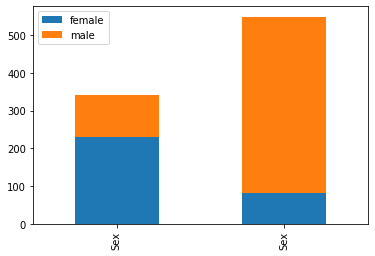

In [ ]:
graph('Sex')

In [ ]:
df_train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_S = LabelEncoder()

In [ ]:
le_E = LabelEncoder()

In [ ]:
df_train['Sex'] = le_S.fit_transform(df_train['Sex'])
df_train['Embarked'] = le_E.fit_transform(df_train['Embarked'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df_test['Sex'] = le_S.transform(df_test['Sex'])
df_test['Embarked'] = le_E.transform(df_test['Embarked'])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
le_E.classes_

array(['C', 'Q', 'S'], dtype=object)

In [ ]:
X_train = df_train.iloc[:,1:].values
Y_train = df_train.iloc[:, 0].values
X_test = df_test.values
X_train

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.925     ,  2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  2.        ,
        23.45      ,  2.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
        30.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         7.75      ,  1.        ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.82520863,  0.73534203, -0.59049493, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.57221121, -1.35991138,  0.64397101, ..., -0.47432585,
         0.78894661, -1.93955453],
       [ 0.82520863, -1.35991138, -0.28187844, ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 0.82520863, -1.35991138,  0.00352373, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [-1.57221121,  0.73534203, -0.28187844, ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 0.82520863,  0.73534203,  0.18104628, ..., -0.47432585,
        -0.49017322, -0.67635748]])

# Model Fitting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = clf.predict(X_train)

In [ ]:
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [ ]:
(pred==Y_train).sum()/pred.shape

array([0.85826772])

In [ ]:
pred.shape

(889,)